In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# **Converting Into Gray Scale Image**

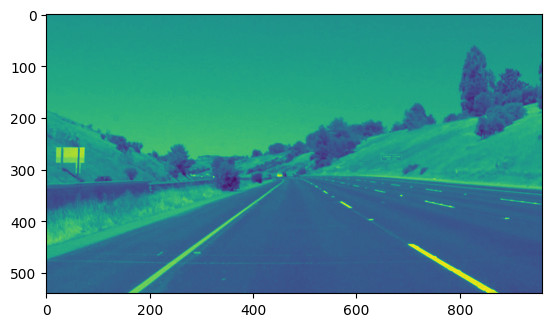

In [2]:
# Reading colored image.
img = cv2.imread("/content/img.jpeg")

# Converting into gray scale image.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.show()

# **Performing Gaussian Blur**

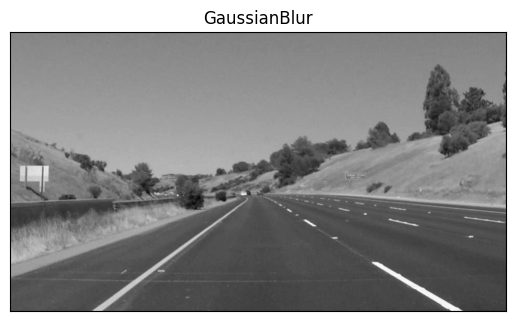

In [3]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(gray, cmap='gray')
plt.title('GaussianBlur'), plt.xticks([]), plt.yticks([])
plt.show()

# **Find Edges Using Canny Edge Detector**

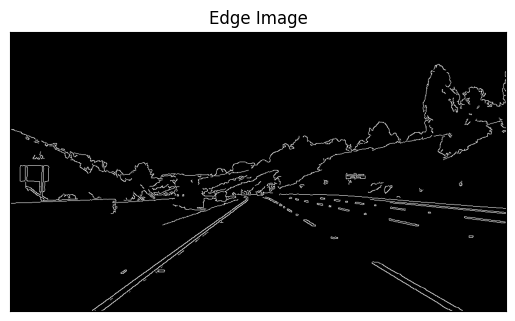

In [4]:
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title("Edge Image"), plt.xticks([]), plt.yticks([])
plt.show()

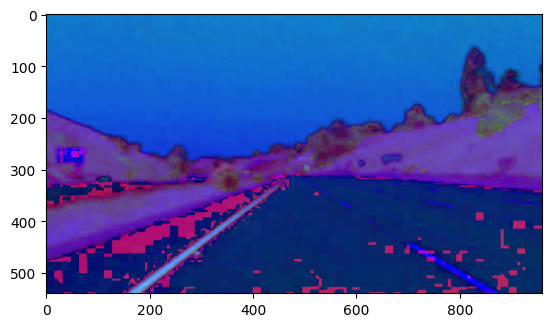

In [5]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)
plt.show()

# **Converting into HSV Color Space and Taking out only required pixel values**

In [6]:
# Converting the image space from RGB -> HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

lower_yellow = np.array([20, 100, 100], dtype="uint8")
upper_yellow = np.array([30, 255, 255], dtype="uint8")

mask_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
mask_white = cv2.inRange(gray, 200, 255)
mask_yw = cv2.bitwise_or(mask_yellow, mask_white)
mask_yw_image = cv2.bitwise_and(gray, mask_yw)

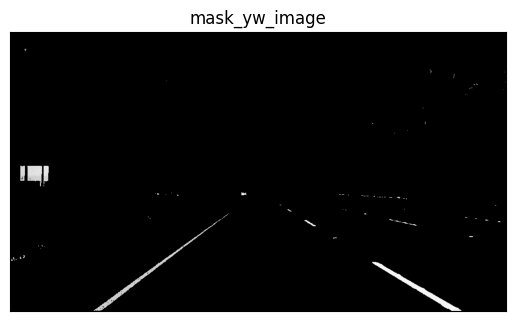

In [7]:
plt.imshow(mask_yw_image, cmap='gray')
plt.title('mask_yw_image'), plt.xticks([]), plt.yticks([])
plt.show()

# **Final Code**

### Importing Libraries

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Preprocessing Of Image

In [9]:
# Reading colored image.
img = cv2.imread("/content/img.jpeg")

[[228 500 415 359]]
[[160 539 235 484]]
[[712 445 874 538]]
[[700 447 852 538]]
[[160 538 378 380]]
[[179 538 274 466]]
[ -0.74250235 663.96855812]
[ 0.58637914 32.09015595]


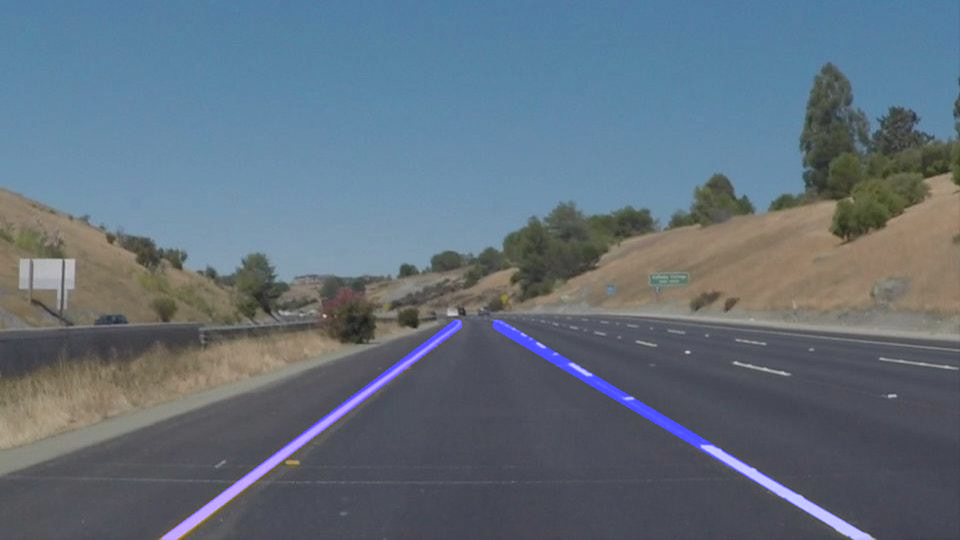

-1

In [12]:
# Convert into gray scale
def gray(image):
  image = np.asarray(image)
  return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Applying gaussian filter to smoothen the image
def gauss(image):
  return cv2.GaussianBlur(image, (5, 5), 0)

# Applying Canny-Edge detection to detect edges
def canny(image, p1, p2):
  edges = cv2.Canny(image, p1, p2)
  return edges

# Isolating the region where lanes are present
def region(image):
  height, width = image.shape
  triangle = np.array([
          [(100, height), (475, 325), (width, height)]
  ])

  mask = np.zeros_like(image)
  mask = cv2.fillPoly(mask, triangle, 255)
  mask = cv2.bitwise_and(image, mask)

  return mask

def make_points(image, average):
  print(average)

  slope, y_int = average
  y1 = image.shape[0]
  y2 = int(y1 * (3/5))
  x1 = int((y1 - y_int) // slope)
  x2 = int((y2 - y_int) // slope)

  return np.array([x1, y1, x2, y2])

# To optimize and displaying lines
def average(image, lines):
  left = []
  right = []

  for line in lines:
    print(line)

    x1, y1, x2, y2 = line.reshape(4)
    parameters = np.polyfit((x1, x2), (y1,y2), 1)

    slope = parameters[0]
    y_int = parameters[1]

    if slope < 0:
      left.append((slope, y_int))
    else:
      right.append((slope, y_int))

  right_avg = np.average(right, axis=0)
  left_avg = np.average(left, axis=0)
  left_line = make_points(image, left_avg)
  right_line = make_points(image, right_avg)

  return np.array([left_line, right_line])

def display_lines(image, lines):
  lines_image = np.zeros_like(image)

  if lines is not None:
    for line in lines:
      x1, y1, x2, y2 = line

      cv2.line(lines_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

  return lines_image

from google.colab.patches import cv2_imshow

copy = np.copy(img)
gray = gray(copy)
gaus = gauss(gray)
edges = canny(gaus, 50, 150)
isolated = region(edges)
# Hough line transform
lines = cv2.HoughLinesP(isolated, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)

averaged_lines = average(copy, lines)
black_lines = display_lines(copy, averaged_lines)
lanes = cv2.addWeighted(copy, 0.8, black_lines, 1, 1)
cv2_imshow(lanes)
cv2.waitKey(0)